## Import Libraries

In [1]:
import cv2
import os
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Import Env File

In [2]:
from dotenv import load_dotenv  

load_dotenv()
# datasets_path = os.getenv('AUGMENTED_PATH_BALI_PEKALONGAN')
datasets_path = os.getenv('AUGMENTED_PATH_JOGJA_PEKALONGAN')
models_path = os.getenv('MODELS_PATH')

In [3]:
os.listdir(datasets_path)

['jogja', 'pekalongan']

## Parameters

In [4]:
test_split_ratio = 0.2

## GLCM Function

In [5]:
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tambahkan jarak dan sudut yang bervariasi
    distances = [1, 2, 3]  # Jarak pixel: 1, 2, 3
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut: 0°, 45°, 90°, 135°

    # Hitung GLCM
    glcm = graycomatrix(gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Daftar fitur yang ingin diambil
    props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

    features = []

    # Ekstraksi setiap fitur dan flatten hasilnya
    for prop in props:
        prop_values = graycoprops(glcm, prop)  # shape = (len(distances), len(angles))
        features.extend(prop_values.flatten())

    return features

## Load The Dataset and Extract The Features

In [6]:
features = []
labels = []

for class_idx, class_name in enumerate(os.listdir(datasets_path)):
    folder = os.path.join(datasets_path, class_name)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tambahkan fitur dari gambar asli juga jika diinginkan
        glcm_features = extract_glcm_features(image)
        features.append(glcm_features)
        labels.append(class_idx)

features = np.array(features)
labels = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=test_split_ratio,
    random_state=42,
    stratify=labels  # Menjaga distribusi kelas tetap seimbang
)

In [8]:
# Melihat 10 baris pertama dari X_train
print("X_train sebelum normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sebelum normalisasi (10 baris pertama):
[[6.25147502e+02 1.02724266e+03 5.70857964e+02 1.02724981e+03
  1.60160063e+03 1.02724266e+03 1.50363600e+03 1.02724981e+03
  2.22994200e+03 2.16569980e+03 2.11383403e+03 2.17422863e+03
  1.69736547e+01 2.19907096e+01 1.62615111e+01 2.20701402e+01
  2.75422297e+01 2.19907096e+01 2.67487331e+01 2.20701402e+01
  3.26242122e+01 3.22549915e+01 3.18893019e+01 3.24317426e+01
  1.63325988e-01 1.47307713e-01 1.65677296e-01 1.45352265e-01
  1.33257536e-01 1.47307713e-01 1.36794284e-01 1.45352265e-01
  1.25163907e-01 1.24304237e-01 1.25631699e-01 1.22756211e-01
  7.49312166e-02 7.22775985e-02 7.55400718e-02 7.20035555e-02
  7.05148492e-02 7.22775985e-02 7.12091768e-02 7.20035555e-02
  6.84221578e-02 6.77504834e-02 6.91326173e-02 6.72941352e-02
  9.09586994e-01 8.50677994e-01 9.17409434e-01 8.50676954e-01
  7.67311735e-01 8.50677994e-01 7.81394317e-01 8.50676954e-01
  6.74602375e-01 6.82159349e-01 6.91251092e-01 6.80907446e-01]
 [1.78908312e+02 3.07

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        

In [10]:
# Melihat 10 baris pertama dari X_train
print("X_train sesudah normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sesudah normalisasi (10 baris pertama):
[[-5.99247841e-01 -5.22090069e-01 -4.36648097e-01 -5.97984607e-01
  -6.02869409e-01 -5.22090069e-01 -4.19359099e-01 -5.97984607e-01
  -6.36501354e-01 -5.40437517e-01 -4.77872442e-01 -6.07820033e-01
  -4.52384718e-01 -2.88854486e-01 -1.93153510e-01 -3.78879314e-01
  -4.07752171e-01 -2.88854486e-01 -1.09073430e-01 -3.78879314e-01
  -4.86572335e-01 -3.39919516e-01 -2.11719763e-01 -4.19481716e-01
  -1.04188990e-01 -1.11219956e-01 -2.17899516e-01 -1.08216768e-01
  -8.23359125e-02 -1.11219956e-01 -1.63851569e-01 -1.08216768e-01
   4.02558277e-03 -4.66123157e-02 -1.19908012e-01 -3.87213009e-02
   2.36501425e-01  2.37491437e-01  2.25266423e-01  2.34578052e-01
   2.46225174e-01  2.37491437e-01  2.32817737e-01  2.34578052e-01
   2.63789383e-01  2.60834445e-01  2.48673606e-01  2.55032856e-01
   5.00377916e-01  3.81076695e-01  3.33067255e-01  4.52301350e-01
   4.62023469e-01  3.81076695e-01  2.11584954e-01  4.52301350e-01
   5.00942691e-01  3.3186658

In [14]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95) 
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (768, 60)
X_test shape: (192, 60)


In [12]:
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

Y_train shape: (768,)
Y_test shape: (192,)


In [18]:
# # Melihat 10 baris pertama dari X_train_pca
# print("X_train_pca (10 baris pertama):")
# print(X_train_pca[:10])

## Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Untuk kernel linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel RBF
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel poly
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3],
    'class_weight': [None]
}

# Gabungkan semua grid
param_grid = [param_grid_linear, param_grid_rbf, param_grid_poly]

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Fitting 5 folds for each of 188 candidates, totalling 940 fits
Best parameters: {'C': 10, 'class_weight': None, 'coef0': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True, 'tol': 0.001}
Best cross-validation score: 0.9479670656141245


## Model

In [14]:
from sklearn.svm import SVC

# Gunakan parameter terbaik dari GridSearchCV
# best_model = SVC(C=10, class_weight=None, gamma='auto', kernel='rbf', shrinking=True, tol=0.001)
best_model = SVC(C=10, class_weight=None, coef0=0.5 , degree=3, gamma='scale', kernel='poly', shrinking=True, tol=0.001)
best_model.fit(X_train, y_train)


SVC(C=10, coef0=0.5, kernel='poly')

## Evaluates

In [15]:
# Evaluasi model
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.9322916666666666
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        96
           1       0.91      0.96      0.93        96

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



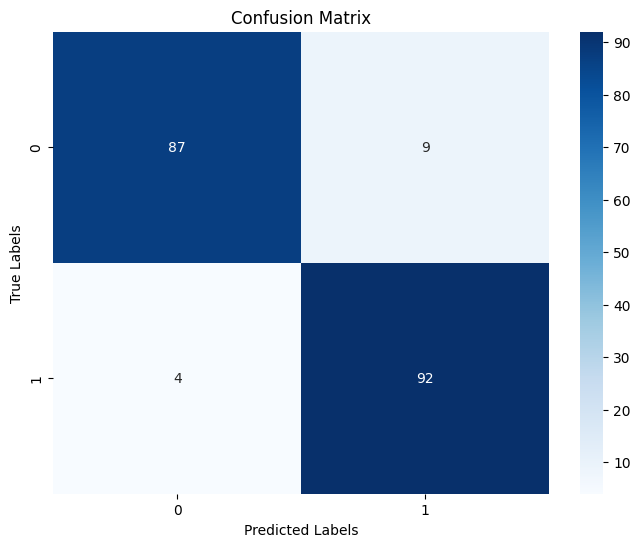

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Save The Model

In [18]:
from joblib import dump

# Simpan model ke file
dump(best_model, models_path+'/svm_glcm_model2.joblib')

['D:/Batik-Classifier-Model/Output/svm_glcm_model2.joblib']